# Machine Learning Model for Heart Disease Prediction

### 1. Import Relevant Libraries/Packages

In [71]:
# General libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Libraries for data preprocessing and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Libraries for building the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library for model saving
import joblib

### 2. Load Preprocessed Dataset

In [91]:
df = pd.read_csv('data/heart_preprocessed_data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,173,140,289,0,1,172,0,0.0,2,0
1,49,0,203,160,180,0,1,156,0,1.0,1,1
2,37,1,173,130,283,0,2,98,0,0.0,2,0
3,48,0,496,138,214,0,1,108,1,1.5,1,1
4,54,1,203,150,195,0,1,122,0,0.0,2,0


### 3. Splitting Data

In [92]:
# Splitting the data into independent and dependent variables

# independent variables
X = df.drop('HeartDisease', axis=1)

# dependent variable
y = df['HeartDisease']

In [74]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((688, 11), (230, 11), (688,), (230,))

### 4. Data Standardization

In [75]:
# Standardizing the data
scaler = StandardScaler()

# Fitting the scaler to the training data
X_train = scaler.fit_transform(X_train)

# Transforming the testing data
X_test = scaler.transform(X_test)

In [76]:
X_train

array([[ 0.23929215,  0.5370191 ,  0.89002842, ...,  1.18203745,
         1.90045807, -0.604929  ],
       [ 0.23929215,  0.5370191 , -0.91477481, ..., -0.84599688,
        -0.83473854, -0.604929  ],
       [ 0.55896789,  0.5370191 , -0.91477481, ..., -0.84599688,
         0.62403298,  1.08005542],
       ...,
       [ 0.66552646,  0.5370191 ,  0.89002842, ...,  1.18203745,
         0.44168654,  1.08005542],
       [ 0.66552646,  0.5370191 ,  0.89002842, ...,  1.18203745,
        -0.83473854,  1.08005542],
       [-1.46564508, -1.86213116,  0.89002842, ..., -0.84599688,
         0.98872587, -0.604929  ]])

In [77]:
X_test

array([[ 0.9852022 , -1.86213116, -1.09956695, ..., -0.84599688,
        -0.83473854,  1.08005542],
       [-0.08038358,  0.5370191 , -0.91477481, ..., -0.84599688,
        -0.83473854, -0.604929  ],
       [ 1.19831935,  0.5370191 ,  0.89002842, ..., -0.84599688,
         0.2593401 , -0.604929  ],
       ...,
       [-0.08038358,  0.5370191 ,  0.89002842, ..., -0.84599688,
         0.53285976,  1.08005542],
       [ 0.026175  ,  0.5370191 , -1.09956695, ..., -0.84599688,
        -0.83473854,  1.08005542],
       [-1.57220366, -1.86213116, -0.91477481, ..., -0.84599688,
        -0.83473854, -0.604929  ]])

### 5. Model Selection and Evaluation

In [78]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)*100
    confusion = confusion_matrix(true, predicted)
    classification_rep = classification_report(true, predicted)
    return accuracy, confusion, classification_rep

In [79]:
# model to be used
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy, confusion, classification_rep = evaluate_model(y_test, y_pred)
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Confusion Matrix: \n{confusion}")
    print(f"Classification Report: \n{classification_rep}")
    print("="*55)

Model: Logistic Regression
Accuracy: 86.52%
Confusion Matrix: 
[[ 86  12]
 [ 19 113]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230

Model: Decision Tree
Accuracy: 79.57%
Confusion Matrix: 
[[ 81  17]
 [ 30 102]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        98
           1       0.86      0.77      0.81       132

    accuracy                           0.80       230
   macro avg       0.79      0.80      0.79       230
weighted avg       0.80      0.80      0.80       230

Model: Random Forest
Accuracy: 90.00%
Confusion Matrix: 
[[ 89   9]
 [ 14 118]]
Classification Report: 
              precision    r

In [80]:
# Dataframe for the model and their accuracy in descending order
model_df = pd.DataFrame({'Model': model_list, 'Accuracy': (accuracy_list)}).sort_values(by='Accuracy', ascending=False)
model_df

,Model,Accuracy
2,Random Forest,90.000000
8,Extra Trees,88.260870
3,K-Nearest Neighbors,87.391304
9,XGBoost,86.956522
5,Gaussian Naive Bayes,86.521739
0,Logistic Regression,86.521739
4,Support Vector Machine,86.521739
7,Gradient Boosting,86.086957
6,AdaBoost,84.782609
1,Decision Tree,79.565217


**Conclusion:** The Random Forest model has the highest accuracy of 90.00%. The model can be used to predict heart disease from given patients data. So, Now we will train the final model using the entire dataset and save it for future use.

### 6. Final Model Training

In [94]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy, confusion, classification_rep = evaluate_model(y_test, rfc_pred)
print(f"Model: Random Forest Classifier")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Confusion Matrix: \n{confusion}")
print(f"Classification Report: \n{classification_rep}")

# Cross Validation
cross_val = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
print(f"Cross Validation Score: {cross_val.mean()*100:.2f}%\n")

Model: Random Forest Classifier
Accuracy: 87.83%
Confusion Matrix: 
[[ 88  10]
 [ 18 114]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        98
           1       0.92      0.86      0.89       132

    accuracy                           0.88       230
   macro avg       0.87      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230

Cross Validation Score: 85.60%



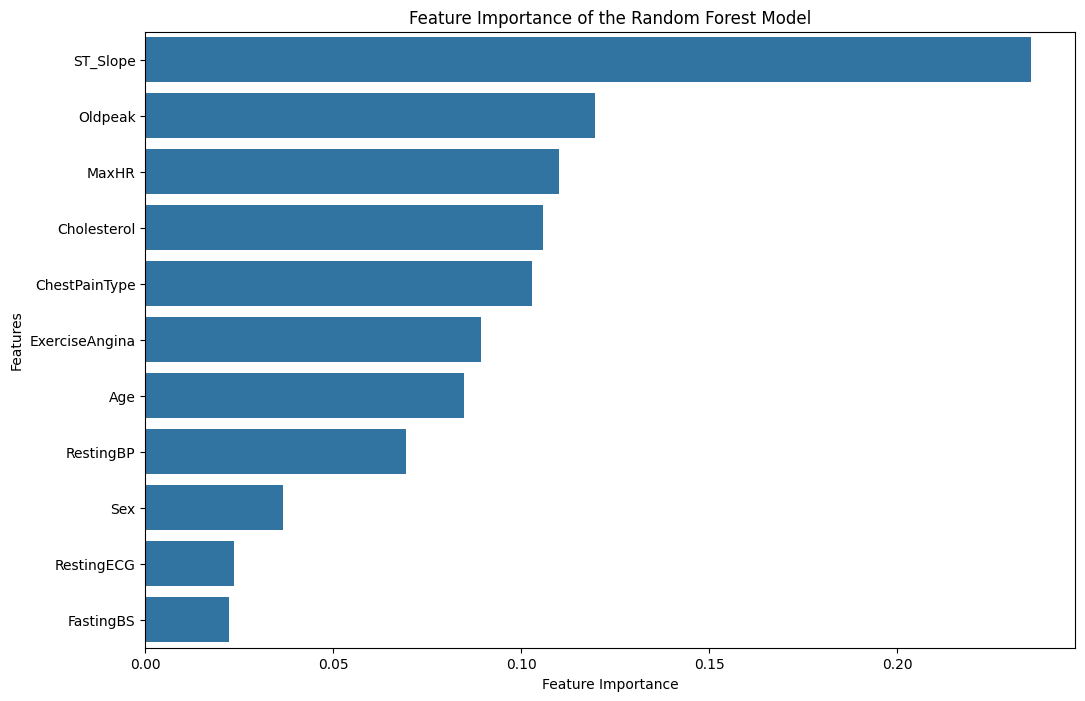

In [95]:
# Plotting the Feature Importance
plt.figure(figsize=(12, 8))
feature_importance_df = pd.DataFrame({'Feature Importance': rfc.feature_importances_}, index=X.columns)
feature_importance_df = feature_importance_df.sort_values(by='Feature Importance', ascending=False)
sns.barplot(x=feature_importance_df['Feature Importance'], y=feature_importance_df.index)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of the Random Forest Model')
plt.show()

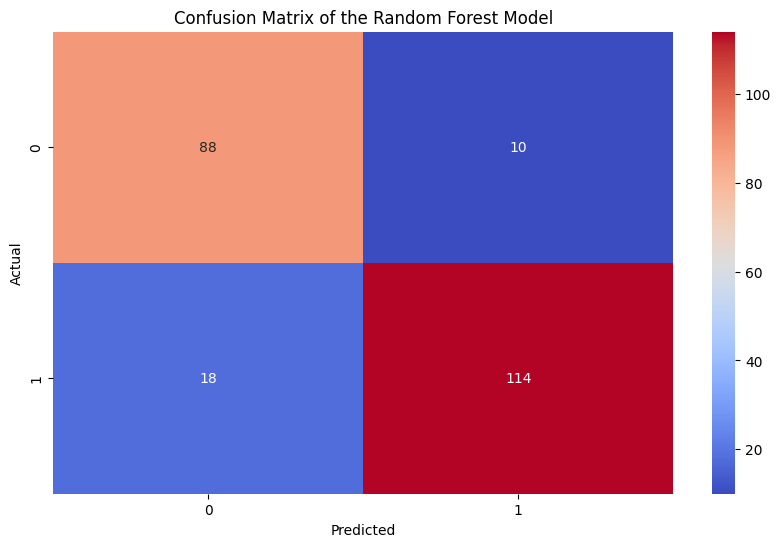

In [96]:
# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Random Forest Model')
plt.show()

### 7. Training Final Model on Entire Dataset and Saving It

In [97]:
rfc_model = RandomForestClassifier()

# Scaling the data
X = scaler.fit_transform(X)

# Fitting the model
rfc_model.fit(X, y)

# Saving the model
joblib.dump(rfc_model, 'artifacts/rfc_model.pkl')
print("Model Saved Successfully")

# Saving the scaler
joblib.dump(scaler, 'artifacts/scaler.pkl')
print("Scaler Saved Successfully")

Model Saved Successfully
Scaler Saved Successfully


### 8. Testing Model on Both Unseen Data and Seen Data

#### 8.1 Unseen Data

In [98]:
model = joblib.load('artifacts/rfc_model.pkl')
scaler = joblib.load('artifacts/scaler.pkl')

new_data = {
    'Age':56, 'Sex':1, 'ChestPainType':173, 'RestingBP':148, 'Cholesterol':201, 'FastingBS':1, 'RestingECG':1, 'MaxHR':120, 'ExerciseAngina':1,
    'Oldpeak':1.7, 'ST_Slope':2
}
new_df = pd.DataFrame(new_data, index=[0])
new_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,56,1,173,148,201,1,1,120,1,1.7,2


In [99]:
# standardize the new data
scaled_new_data = scaler.fit_transform(new_df)

# prediction on new data
prediction = model.predict(scaled_new_data)

if prediction[0] == 1:
    print("Patient is suffering from Heart Disease")
else:
    print("Patient is not suffering from Heart Disease")

Patient is suffering from Heart Disease


#### 8.2 Seen Data

In [105]:
# Testing model with seen data
seen_data = df.iloc[1].drop('HeartDisease')
seen_data

Age                49.0
Sex                 0.0
ChestPainType     203.0
RestingBP         160.0
Cholesterol       180.0
FastingBS           0.0
RestingECG          1.0
MaxHR             156.0
ExerciseAngina      0.0
Oldpeak             1.0
ST_Slope            1.0
Name: 1, dtype: float64

In [106]:
# Standardizing the seen data
seen_data = scaler.transform([seen_data])

# Prediction on seen data
prediction = model.predict(seen_data)

if prediction[0] == 1:
    print("Patient is suffering from Heart Disease")
else:
    print("Patient is not suffering from Heart Disease")


Patient is suffering from Heart Disease
